# <font color='red'>SGD Algorithm to predict movie ratings</font>

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $


<font color='red'> Reading the csv file </font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [3]:
data.shape

(89992, 3)

<font color='red'>Create adjacency matrix </font>

In [0]:
from scipy.sparse import csr_matrix
# write your code of adjacency matrix here
adjacency_matrix = csr_matrix((data['rating'], (data['user_id'], data['item_id'])), 
                              shape=(max(data['user_id'])+1, max(data['item_id'])+1))


In [5]:
adjacency_matrix.shape

(943, 1681)

<font color='red'> SVD decompostion</font>

In [7]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>SVD decompostion</font>

In [8]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Compute mean of ratings</font>

In [0]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return np.mean(ratings) 

In [10]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [0]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return [0]*dim

In [0]:
dim= 943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [0]:
dim= 1681 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='red'>Compute dL/db_i</font>

In [0]:
def derivative_db(user_id,item_id,rating,U2,V2,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    db = 2*(alpha*b_i[user_id]) - 2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U2[user_id],V2[item_id]))
    return db


<font color='red'>Compute dL/dc_j</font>

In [0]:
def derivative_dc(user_id,item_id,rating,U2,V2,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    dc = 2*(alpha*c_j[user_id]) - 2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U2[user_id],V2[item_id]))
    return dc


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [20]:
# Learning rate : 0.001
# Regularization Rate : 0.1
from tqdm import tqdm_notebook
U2, Sigma2, V2 = randomized_svd(adjacency_matrix, n_components=5, n_iter=5, random_state=24)

dim= 943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)
dim= 1681 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)
mu=m_u(data['rating'])

Epoch_list = []
MSE_list   = []

#Iterating over entire dataset multiple times
for epoch in tqdm_notebook(range(32)):
    #Iterating over the entire data
    
    for index_user, user_i in enumerate(U2):
        # updating  bias for each user and movie
        for index_movie, movie_i in enumerate(V2.T):
            if adjacency_matrix[index_user,index_movie] != 0 :
                b_i[index_user] = (b_i[index_user] - 0.001 * derivative_db(index_user,index_movie,
                                adjacency_matrix[index_user,index_movie],U2,V2.T,mu,0.1))
                c_j[index_movie] = (c_j[index_movie] - 0.001 * derivative_dc(index_user,index_movie,
                                    adjacency_matrix[index_user,index_movie],U2,V2.T,mu,0.1))

  
    #Calculate Mean square error
    MSE = 0 
    total = 0
    for index_user_mse, user_i_mse in enumerate(U2):
      for index_movie_mse, movie_i_mse in enumerate(V2.T):
          if adjacency_matrix[index_user_mse,index_movie_mse] != 0 :
              MSE_temp = (adjacency_matrix[index_user_mse,index_movie_mse] - mu - b_i[index_user_mse]
                    - c_j[index_movie_mse] - np.dot(user_i_mse,movie_i_mse))
              MSE += np.square(MSE_temp)
              total +=1
              
    MSE = MSE/total
    print("Epoch : ",epoch,"   MSE : ",MSE)
    MSE_list.append(MSE)
    Epoch_list.append(epoch)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


Epoch :  0    MSE :  1.0792979326327954
Epoch :  1    MSE :  1.0063634576597662
Epoch :  2    MSE :  0.9674545157833951
Epoch :  3    MSE :  0.9430786389828958
Epoch :  4    MSE :  0.9262075507848025
Epoch :  5    MSE :  0.9137233156750264
Epoch :  6    MSE :  0.9040441812240207
Epoch :  7    MSE :  0.8962838644220509
Epoch :  8    MSE :  0.8899054268882897
Epoch :  9    MSE :  0.8845624971311279
Epoch :  10    MSE :  0.8800199651124457
Epoch :  11    MSE :  0.8761114835583825
Epoch :  12    MSE :  0.8727152912179228
Epoch :  13    MSE :  0.8697397340174919
Epoch :  14    MSE :  0.8671142001878244
Epoch :  15    MSE :  0.8647832220950381
Epoch :  16    MSE :  0.8627025078247023
Epoch :  17    MSE :  0.8608361919990605
Epoch :  18    MSE :  0.8591548819143802
Epoch :  19    MSE :  0.8576342373857868
Epoch :  20    MSE :  0.8562539178937354
Epoch :  21    MSE :  0.8549967882763454
Epoch :  22    MSE :  0.8538483101297915
Epoch :  23    MSE :  0.852796069044007
Epoch :  24    MSE :  0.851

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

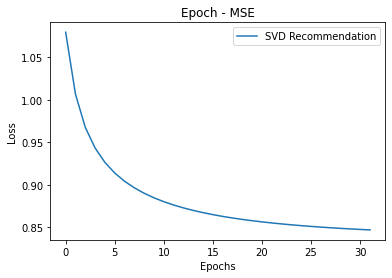

In [21]:
# Plot epoch number v/s MSE

#https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
import matplotlib.pyplot as plt
# line 1 points
epoch_x1 = Epoch_list
MSE_y1 = MSE_list
# plotting the line 1 points 
plt.plot(epoch_x1, MSE_y1, label="SVD Recommendation")
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis 
plt.ylabel('Loss')
# giving a title to my graph 
plt.title('Epoch - MSE')
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()

<br>

In [26]:
#APPLYING LOGISTIC REGRESSION TO FIGURE OUT IS USER MATRIX HOLDS ANY DATA ABOUT GENDER
clf = LogisticRegression(random_state=0).fit(user_matrix_list, is_male_list)
clf_predict = clf.predict(user_matrix_list)

cm = confusion_matrix(is_male_list, clf_predict)
tn, fp, fn, tp = cm.ravel()
accuracy= (tp+tn)/(tp+tn+fn+fp)


print("True Positive  : ",  tp)
print("False Positive : ", fp)
print("True Negative  : ",  tn)
print("False negative : ", fn)
print("Accuracy       : ",  accuracy)

True Positive  :  141
False Positive :  56
True Negative  :  217
False negative :  132
Accuracy       :  0.6556776556776557


Based on the Output given by Logistic Regression
The accuracy is very poor is 65%
so basically no learning took place
so mostly the matrix U representing user holds no information 
on gender of the user